In [2]:
import pandas as pd
from tqdm.notebook import tnrange, tqdm
import matplotlib.pyplot as plt

In [3]:
local_csv_path='state-farm-distracted-driver-detection/driver_imgs_list.csv'
kaggle_csv_path='../input/state-farm-distracted-driver-detection/driver_imgs_list.csv'
df=pd.read_csv(local_csv_path)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB
None


,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [8]:
df["classname"].value_counts()

c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64

In [23]:
class_list = ['safe', 'text-R', 'talk on phone-R', 'text-L', 'talk on phone-L', 'radio', 'drink'
, 'reach behind', 'hair/make-up', 'talk to passenger']


In [62]:
dt = (dict(df["classname"].value_counts()))

## Visualise the class distribution :

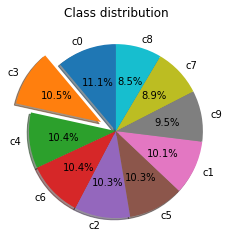

In [63]:
def plot_dict_pie(dictionary):
    slices = list(dictionary.values())
    activities = list(dictionary.keys())
    plt.pie(slices,
            labels=activities,
            startangle=90,
            shadow= True,
            explode=(0,0.2,0,0, 0, 0, 0, 0, 0, 0),
            autopct='%1.1f%%')

    plt.title('Class distribution')
    plt.show()

plot_dict_pie(dt)

## Oversample the minoity classes :

In [67]:
def balance_df(df, cls):
    max_size = df[cls].value_counts().max()
    lst = [df]
    for class_index, group in df.groupby(cls):
        lst.append(group.sample(max_size-len(group), replace=True))
    frame_new = pd.concat(lst)
    df2=frame_new
    df3=df2.sample(frac=1) # randomise
    return(df3)

df2 = balance_df(df, 'classname')

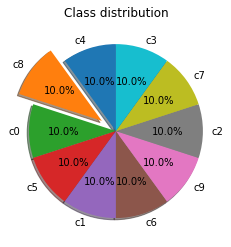

In [68]:
balanced_dt = dict(df2["classname"].value_counts())
plot_dict_pie(balanced_dt)

## Convert back to CSV

In [6]:
df.to_csv('balanced.csv')